In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('D:/김동영/11_Github/mygit/비즈니스시계열/Data/24년일별관중수.csv')

### 전처리

In [52]:
df.head()

# df.info()

df['Game_Date'] = pd.to_datetime(df['Game_Date'])

df.info()

df.head()

df = df.sort_values(by='Game_Date', ascending=True)

df.head()

# df.isna().sum()

df['Day'] = df['Day'].apply(lambda x: '주중' if x != '주말' else x)

df['Day'].value_counts()

df.rename(columns={'Audience_Qty': '홈팀 관중 수', 'Audience_Away_Qty': '원정팀 관중 수'}, inplace=True)

df['월'] = df['Game_Date'].dt.month
df['일'] = df['Game_Date'].dt.day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rank               228 non-null    int64         
 1   Meet_Year          228 non-null    int64         
 2   LEAGUE_NAME        228 non-null    object        
 3   Meet_Name          228 non-null    object        
 4   Game_id            228 non-null    int64         
 5   Game_Date          228 non-null    datetime64[ns]
 6   HomeTeam           228 non-null    object        
 7   AwayTeam           228 non-null    object        
 8   Field_Name         228 non-null    object        
 9   Audience_Qty       228 non-null    int64         
 10  Audience_Away_Qty  228 non-null    int64         
 11  Day                228 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 21.5+ KB


In [53]:
df.head()

,Rank,Meet_Year,LEAGUE_NAME,Meet_Name,Game_id,Game_Date,HomeTeam,AwayTeam,Field_Name,홈팀 관중 수,원정팀 관중 수,Day,월,일
15,16,2024,K리그1,하나은행 K리그1 2024,2,2024-03-01,전북,대전,전주 월드컵,24758,3332,주중,3,1
9,10,2024,K리그1,하나은행 K리그1 2024,1,2024-03-01,울산,포항,울산 문수,28683,2321,주중,3,1
136,137,2024,K리그1,하나은행 K리그1 2024,3,2024-03-02,광주,서울,광주 전용,7805,1420,주말,3,2
167,168,2024,K리그1,하나은행 K리그1 2024,5,2024-03-02,강원,제주,춘천 송암,6021,215,주말,3,2
40,41,2024,K리그1,하나은행 K리그1 2024,4,2024-03-02,인천,수원FC,인천 전용,15060,1349,주말,3,2


In [54]:
df['Field_Name'].unique()

array(['전주 월드컵', '울산 문수', '광주 전용', '춘천 송암', '인천 전용', '대구iM뱅크PARK',
       '수원 종합', '포항 스틸야드', '김천 종합', '서울 월드컵', '제주 월드컵', '대전 월드컵', '강릉 종합',
       '울산 종합'], dtype=object)

In [55]:
df.head()

# df_Seoul_Home = df[df['HomeTeam'] == '서울']
# df_Souel_Away = df[df['AwayTeam'] == '서울']
df_Seoul = df[df['Field_Name'] == '서울 월드컵']


df_Seoul = df_Seoul.sort_values(by='월', ascending=True)

In [56]:
# df_Seoul = pd.concat([df_Seoul_Home, df_Souel_Away], axis=0)

In [57]:
df_Seoul

df_Seoul['Match_Day'] = range(1, len(df_Seoul) + 1)
df_Seoul = df_Seoul.sort_values(by='Match_Day', ascending=True)
df_Seoul

,Rank,Meet_Year,LEAGUE_NAME,Meet_Name,Game_id,Game_Date,HomeTeam,AwayTeam,Field_Name,홈팀 관중 수,원정팀 관중 수,Day,월,일,Match_Day
1,2,2024,K리그1,하나은행 K리그1 2024,12,2024-03-10,서울,인천,서울 월드컵,51670,4307,주말,3,10,1
5,6,2024,K리그1,하나은행 K리그1 2024,15,2024-03-16,서울,제주,서울 월드컵,29536,1028,주말,3,16,2
60,61,2024,K리그1,하나은행 K리그1 2024,28,2024-04-03,서울,김천,서울 월드컵,13040,188,주중,4,3,3
7,8,2024,K리그1,하나은행 K리그1 2024,38,2024-04-13,서울,포항,서울 월드컵,29051,2396,주말,4,13,4
10,11,2024,K리그1,하나은행 K리그1 2024,46,2024-04-20,서울,전북,서울 월드컵,28048,4296,주말,4,20,5
0,1,2024,K리그1,하나은행 K리그1 2024,61,2024-05-04,서울,울산,서울 월드컵,52600,6787,주말,5,4,6
11,12,2024,K리그1,하나은행 K리그1 2024,76,2024-05-19,서울,대구,서울 월드컵,27365,1840,주말,5,19,7
54,55,2024,K리그1,하나은행 K리그1 2024,113,2024-06-26,서울,강원,서울 월드컵,13303,782,주중,6,26,8
14,15,2024,K리그1,하나은행 K리그1 2024,106,2024-06-22,서울,수원FC,서울 월드컵,25157,1119,주말,6,22,9
23,24,2024,K리그1,하나은행 K리그1 2024,96,2024-06-02,서울,광주,서울 월드컵,21100,903,주말,6,2,10


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54856 (\N{HANGUL SYLLABLE HOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54016 (\N{HANGUL SYLLABLE TIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Progra

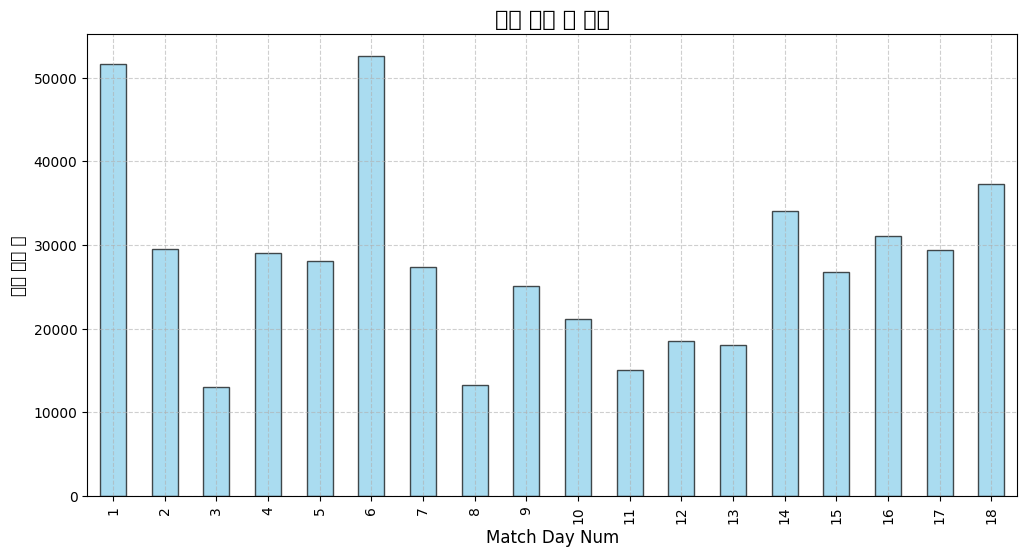

In [ ]:
df_Seoul.set_index('Match_Day', inplace=True)

df_Seoul['홈팀 관중 수'].plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7, figsize=(12, 6))
plt.title('홈팀 관중 수 분포', fontsize=16)
plt.xlabel('Match Day Num', fontsize=12)
plt.ylabel('홈팀 관중 수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [59]:
# 월별 홈팀 관중 수 합계 및 평균 계산
monthly_audience = df.groupby('월')['홈팀 관중 수'].agg(['sum', 'mean']).reset_index()

# 결과 출력
print(monthly_audience)

    월     sum          mean
0   3  341799  14241.625000
1   4  297552   9598.451613
2   5  346383   9896.657143
3   6  297609   9920.300000
4   7  286863   9562.100000
5   8  241733  12086.650000
6   9  266129  12096.772727
7  10  182998  10166.555556
8  11  247519  13751.055556


k리그 전체 평균 홈팀 관중 수를 월별로 확인해보았을 때 3월에 가장 많은 것을 알 수 있었다. 그리고 4,5,6,7월 까지 평균 관중 수가 1만명 이하였다가 9월부터 11월까지 평균 1만명 이상 홈팀 관중들이 경기장을 찾았다. 

In [ ]:
monthly_audience

,월,sum,mean
0,3,341799,14241.625000
1,4,297552,9598.451613
2,5,346383,9896.657143
3,6,297609,9920.300000
4,7,286863,9562.100000
5,8,241733,12086.650000
6,9,266129,12096.772727
7,10,182998,10166.555556
8,11,247519,13751.055556


끄적여본 추가 변수와 관중 간의 관계
- 날씨와 관중 수와의 관계 ex) 추워지거나 날씨가 좋지 않은 날 관중 수가 적어지지 않을까?
- 유명인 경기장 방문과의 관계
- 특정 날과의 관계 ex) 공휴일, 어린이날, 빨간 날 등등
- 경기 외적 변수간의 관계